# Esto es solo para ver si estoy usando Jupyter o la otra herramienta

In [44]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Importo lo necesario
en mi caso voy a usar JupyterNotebook, por lo cual debo importar archivos .py (no .ipynb), los cuales se deben encontrar donde dice FUENTES_DIR: '../Fuente'


In [45]:
import os
print(os.getcwd())
#verifico estar en la carpeta correcta, para poder importar los archivos dentro de la misma carptea que este código

C:\Users\Mateo\Documents\1-uni\2024\cuatri2\aap\pra\pra2-perceptron


In [46]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron

# transformo los datos para poder tratarlos

In [47]:
# Leer el archivo
datos = pd.read_csv(DATOS_DIR + "Drug5.csv")
nColum = list(datos.columns.values)

#-- ordinales a numericos ---
mapeo = {'Sex': {'F':1, 'M':0},
          'BP':{'HIGH':2, 'NORMAL':1, 'LOW':0}, #elijo diferntes números con el mismo espaciado, eso es muy importante
          'Cholesterol':{'NORMAL':0, 'HIGH':1}}

datos.replace(mapeo, inplace=True) # inplace=True se utiliza para indicar que la operación debe realizarse directamente sobre el DataFrame original, en lugar de crear y devolver una copia modificada
datos

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,1,2,1,0.792535,0.031258,drugY
1,47,0,0,1,0.739309,0.056468,drugC
2,47,0,0,1,0.697269,0.068944,drugC
3,28,1,1,1,0.563682,0.072289,drugX
4,61,1,0,1,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,1,0,1,0.848774,0.073380,drugC
196,16,0,0,1,0.743021,0.061886,drugC
197,52,0,1,1,0.549945,0.055581,drugX
198,23,0,1,0,0.784520,0.055959,drugX


In [53]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,:-1])# iloc -> accedo por índice. [:,] -> elijo todas las filas. [,:-1] -> selecciono todas las columnas menos la útltima porque ese es mi campo a predecir
T = np.array((datos['Drug'] == 'drugY') * 1) # array NumPy binario (con valores 0 y 1) basado en una condición que pone un 1 si era la "drugY"
nColum = ['Otra', 'drugY']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( #separo los arreglos de datos en parte de entrenamiento y parte de testeo. El testeo es para luego ver la precisión de lo que entrené
        X, T, test_size=0.30, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no con una librería que ya lo hace por nosotros
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    #normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)
    
print(T)

[1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0]


# La normalización afecta a mis resultados
dependiendo la técnica de normalización, los resultados pueden variar. A continuación voy a anotar los que pasó en los siguientes casos:
- sin normalizar: mejor precisión del 43%. La cantidad de actualizaciones del perceptrón son muchas.Suele llegar al límite de iteraciones ya que no llega al 100% de precisión casi nunca
- normalizando con minMaxScaller: mejor precisión del 100%. La cantidad de actualizaciones del perceptrón son cada vez menos. Suele necesitar unas 20 iteraciones
- normalizando con media y desvío: mejor precisión del 100%. La cantidad de actualizaciones del perceptrón son cada vez menos. No suelo necesitar más de 10 iteraciones

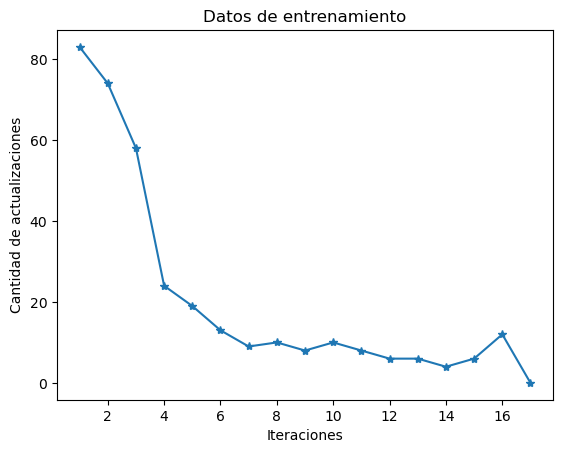

In [49]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None) #inicializamos un perceptron con sus variables
ppn.fit(X_train, T_train)#entrenamos y mandamos los arreglos de entrenamiento, donde X tiene los datos con los que entrenamos y T lo que intentamos predecir

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
# range(1, len(ppn.errors_) + 1) = lista de 1 hasta la cant de errores, esto nos sirve para hacer el eje Y del gráfico
# ppn.errors_ = la lista de errores para cada iteración, nos la da el perceptrón
# marker='o' indica como marco los puntos de la gráfica

#nombro a los ejes
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

### Hay veces que dice que no encuentra a "Perceptron", para ello ejecutar todas las celdas a la vez
# Ahora vamos a comparar los datos de entrenamiento con la parte de datos que guardamos para testear la precisión.
Estos datos de testeo nunca fueron vistos por el perceptrón en el entrenamiento y tampoco lo perfeccionan. Esto simula un uso de un usuario


In [50]:
Y_test = ppn.predict(X_test)

#print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)#cuenta la cantidad de veces que lo predecido es igual a lo esperado en el test
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))#veo el procentaje de aciertos


% de aciertos = 100.00 %


# Hay veces que no llego al límite de iteraciones al entrenar al perceptrón ya que llego a predecir bien todos los campos antes de llegar al límite de iteraciones. Esto no significa que la precisión final sea del 100%, ya que el modelo deja de entrenarse cuando predice todo los campos dentro del arreglo de entrenamiento, la precisión que vemos al final es sobre los campos de testeo


## "normalizador" es un objeto de sklearn, al cual le puedo pedir el máximo y mínimo de cada campo original

In [51]:
normalizador.data_min_

array([15.      ,  0.      ,  0.      ,  0.      ,  0.501956,  0.020022])

In [52]:
normalizador.data_max_

array([74.      ,  1.      ,  2.      ,  1.      ,  0.896056,  0.078906])